In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
seed = 42

In [129]:
samples = pd.concat([
    pd.read_csv(f'./outputs/all_extra/realisations_{i+1}.csv')
    for i in range(100)
])

In [143]:
output_variables = ['pos_M',
    'prop',
    'ICA',
    'ICM',
    'ID',
    'IB',
    'inc'
]
output_columns = [c for c in samples.columns if any([c.startswith(v + '_') for v in output_variables])]
outputs = samples[output_columns]
features = samples.drop(output_columns, 1)
n_features = len(features.columns)
n_outputs = len(outputs.columns)

/tmp/ipykernel_96939/209111588.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = samples.drop(output_columns, 1)


In [144]:
idx_train, idx_test = train_test_split(
    np.arange(len(outputs)),
    test_size=0.2,
    random_state=seed
)

In [145]:
X_train = features.iloc[idx_train]
y_train = outputs.iloc[idx_train]
X_test = features.iloc[idx_test]
y_test = outputs.iloc[idx_test]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

In [147]:
def create_model(
    optimiser='adam',
    n_hidden=[n_features, 100, 100],
    dropouts=[0, .1, .1],
    loss='mse',
    hidden_activation='relu',
    hidden_initialiser='he_normal',
    output_activation='linear',
    output_initialiser='glorot_normal'
):
    model = Sequential()
    model.add(layers.Input(shape=(n_features,), dtype='float32'))
    for i in range(len(n_hidden)):
        model.add(layers.Dense(
            n_hidden[i],
            activation=hidden_activation,
            kernel_initializer=hidden_initialiser)
        )
        if (dropouts[i] > 0):
            model.add(layers.Dropout(dropouts[i]))
    model.add(layers.Dense(n_outputs, activation=output_activation, kernel_initializer=output_initialiser))
    model.compile(loss=loss, optimizer=optimiser, metrics='mse')
    return model

In [154]:
model = create_model()
model.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 39342.4336 - mse: 39342.4336
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 16570.0039 - mse: 16570.0039
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 8383.9160 - mse: 8383.9160
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 7166.6377 - mse: 7166.6377
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 6461.4702 - mse: 6461.4702
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 5920.6504 - mse: 5920.6504
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 5459.8457 - mse: 5459.8457
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 5074.6997 - mse: 5074.6997
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 4767.4355 - mse: 4767.4355
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 44

In [155]:
y_hat = model.predict(X_test)

625/625 [==============================] - 1s 1ms/step


In [156]:
def prev(y):
    pos = y[:, np.where([c.startswith('pos_M') for c in outputs.columns])[0]]
    prop = y[:, np.where([c.startswith('prop') for c in outputs.columns])[0]]
    return np.average(pos, weights=prop, axis=1)

Text(0, 0.5, 'true')

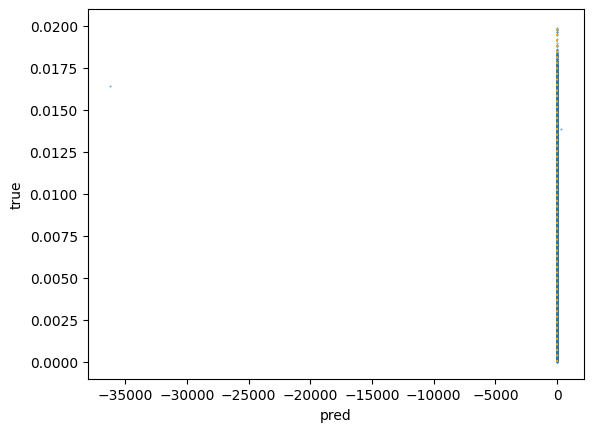

In [157]:
plt.scatter(prev(y_hat), prev(y_test.to_numpy()), s=0.1)
plt.plot(np.linspace(0, 0.02), np.linspace(0, 0.02), linestyle=':', color='orange')
plt.xlabel('pred')
plt.ylabel('true')

In [152]:
outputs.columns

Index(['pos_M_0', 'pos_M_1', 'pos_M_2', 'pos_M_3', 'pos_M_4', 'pos_M_5',
       'pos_M_6', 'pos_M_7', 'pos_M_8', 'pos_M_9',
       ...
       'inc_91', 'inc_92', 'inc_93', 'inc_94', 'inc_95', 'inc_96', 'inc_97',
       'inc_98', 'inc_99', 'inc_100'],
      dtype='object', length=707)